In [1]:
import random
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import statistics 

In [2]:
# Learning params
class Q_learning():
    def __init__(self,
                 alpha,
                 gamma,
                 epsilon,
                 episodes,
                 timesteps,
                 goal_state):
    
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.episodes = episodes
        self.timesteps = timesteps
        self.goal_state = goal_state
    
    def actions_states(self):
        size = 4*4 #grid is 4x4
        # States and Actions
        A=[]
        S=[]
        for x in range(size):
            A.append(x)
            S.append(x)
        return A, S

    def grid_creation(self):
        A, S = self.actions_states()

        # Initialize R matrix with np.nan in all cells
        R =  np.array([[np.nan for a in A] for s in S])

        # Populate R matrix with possible actions + rewards until it matches the R matrix given in the tutorial notes.
        possible_actions = [(0,1),(0,4),(1,0),(1,2),(1,5),(2,1),(2,3),(2,6),(3,2),(3,7),(4,0),(4,5),(4,8),
                            (5,1),(5,4),(5,6),(6,2),(6,5),(6,7),(6,10),(7,3),(7,6),(8,4),(8,12),(10,6),(10,14),
                            (12,8),(12,13),(13,12),(13,14),(14,10),(14,13),(14,15),(15,14)]

        for s,a in possible_actions:
             R[s,a] = -1 #reward -1 if entered a location with no acorn

        R[11,15] = 100 #reward for reaching the destination at the terminal location 15
        R[14,15] = 100 #reward for reaching the destination at the terminal location 15
        R[2,6] = -5 #negative reward for hitting the building at location 6
        R[7,6] = -5 #negative reward for hitting the building at location 6
        R[10,6] = -5 #negative reward for hitting the building at location 6
        R[5,6] = -5 #negative reward for hitting the building at location 6
        R[1,2] = 40 #positive reward for visiting the tree at location 2
        R[6,2] = 40 #positive reward for visiting the tree at location 2
        R[3,2] = 40 #positive reward for visiting the tree at location 2
        

        # Q matrix
        Q = np.zeros(R.shape, dtype=int)
        return R, Q

    def game_run(self):
       
        
        A, S = self.actions_states()
        R, Q = self.grid_creation()
        # Run
        timestep_episode =[] #to keep track of how many timesteps required to reach the goal and stop the episode
        rewards_episode = [] #return obtaines at each episode
        
        for episode in range(self.episodes):
            s = 0 #starting always from 0 position
            reward = 0
            amount_not_break = 0 #will count how many times the amount of timesteps were not sufficient to reach terminal state
            for timestep in range(self.timesteps):

                # Action selection
                available_actions = np.where(~np.isnan(R[s]))[0]
                q_values = [Q[s,a] for a in available_actions]
                best_actions = available_actions[np.where(q_values == np.max(q_values))[0]]
                best_actions_q_values = [Q[s,x] for x in best_actions]

                # Epsilon-greedy
                if np.random.uniform() > self.epsilon:
                    a = np.random.choice(best_actions)#exploitation

                else:
                    a = np.random.choice(available_actions)#exploration
                    
        
                # Environment updating
                r = R[s,a]
                s_old = s
                s = a 
            

                # Q value updating
                Q[s_old,a] = Q[s_old,a] + self.alpha * ( r + self.gamma * np.max(Q[s,:]) - Q[s_old,a])
                reward += max(r-timestep, 0)
                
                if S[s] == self.goal_state:
                    timestep_episode.append(timestep)
                    rewards_episode.append(reward)  
                    break
                if timestep == self.timesteps-1:
                    amount_not_break += 1
                    timestep_episode.append(timestep)
                    rewards_episode.append(reward)
                    
                    
            self.epsilon = self.epsilon*0.99 #decay
        median_timestep_episode = statistics.median(timestep_episode)
        median_reward = statistics.median(rewards_episode)
        av_timestep_episode = statistics.mean(timestep_episode)
        av_reward = statistics.mean(rewards_episode)

#             print('Episode {} finished. Q matrix values:\n{}. q-value {}'.format(episode,Q.round(1),Q[s_old,a]))
#             print('Final Q matrix: \n{}'.format(Q.round(0)))
        return timestep_episode,rewards_episode,amount_not_break, median_timestep_episode, median_reward, av_timestep_episode, av_reward

    
    
  
    def vis_timesteps(self):
        timestep_episode,_,amount_not_break,median_timestep_episode,median_reward, av_timestep_episode, av_reward = self.game_run()
        print('Total amount of times the number of timesteps were not sufficient to reach the terminal state: {}'.format(amount_not_break))
        print('Median of the timesteps is {}'.format(median_timestep_episode))
        print('Median of the returns is {}'.format(median_reward))
        print('Mean of the timesteps is {}'.format(av_timestep_episode))
        print('Mean of the returns is {}'.format(av_reward))
        plt.plot(timestep_episode)
        plt.ylabel('timesteps')
        plt.xlabel('episodes')
        return plt.show()
    
    
    def vis_reward(self):
        _,rewards_episode,amount_not_break,_,_,_,_,= self.game_run()
        plt.plot(rewards_episode)
        plt.ylabel('reward')
        plt.xlabel('episodes')
        return plt.show()


Total amount of times the number of timesteps were not sufficient to reach the terminal state: 1
Median of the timesteps is 499.0
Median of the returns is 400.0
Mean of the timesteps is 480.806
Mean of the returns is 371.154


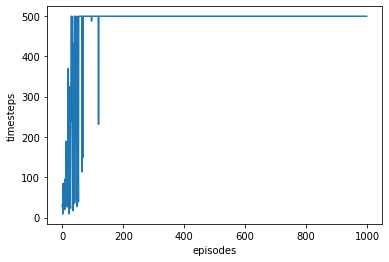

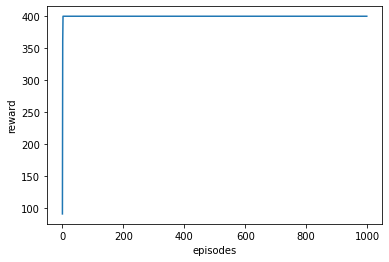

In [3]:
if __name__ == '__main__':
    game = Q_learning(0.99,0.99,0.99,1000,500,15)
    game.vis_timesteps()
    game.vis_reward()

Total amount of times the number of timesteps were not sufficient to reach the terminal state: 0
Median of the timesteps is 29.0
Median of the returns is 118.0
Mean of the timesteps is 39.088
Mean of the returns is 127.667


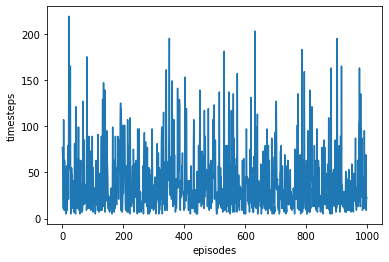

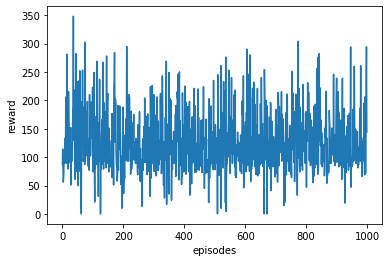

In [4]:
if __name__ == '__main__':
    game = Q_learning(0.01,0.01,0.01,1000,500,15)
    game.vis_timesteps()
    game.vis_reward()


Total amount of times the number of timesteps were not sufficient to reach the terminal state: 1
Median of the timesteps is 499.0
Median of the returns is 400.0
Mean of the timesteps is 464.688
Mean of the returns is 386.062


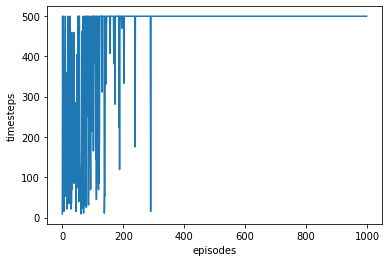

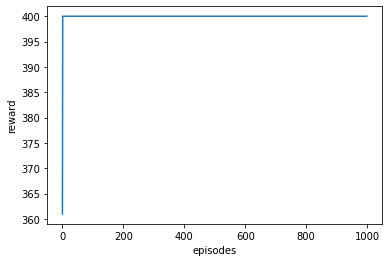

In [5]:
if __name__ == '__main__':
    game = Q_learning(0.5,0.5,0.5,1000,500,15)
    game.vis_timesteps()
    game.vis_reward()
